#### Teofilus San Prasetya

# Stock Price Prediction Using LSTM: A Comparative Analysis of Baseline and Modified Architectures

**The first step involves exploring the data to understand the problem at hand. The dataset provided is a time series, so data preprocessing is necessary to address the issues within it. The time series data is then divided into two parts, input and output, with a window size of 5 days (from Monday to Friday) and a horizon of 1 day (Monday only). Afterward, the dataset is split into three sets: train, validation, and test, with proportions of 80% for training, 10% for validation, and 10% for testing.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read CSV file for both datasets

In [4]:
# Reading data from both datasets with CSV files
data_AAPL = pd.read_csv('AAPL.csv')
data_AMD = pd.read_csv('AMD.csv')

### Perform exploration of the AAPL dataset and the AMD dataset

In [5]:
# Displaying AAPL data
data_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [6]:
# Displaying the columns in the AAPL dataset
data_AAPL.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# Displaying the dimensions of the data_AAPL DataFrame (number of rows and columns)
data_AAPL.shape

(9909, 7)

In [8]:
# Displaying AMD data
data_AMD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [9]:
# Displaying the columns in the AMD dataset
data_AMD.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
# Displaying the dimensions of the data_AMD DataFrame (number of rows and columns)
data_AMD.shape

(10098, 7)

### Converting the 'Date' column to a datetime index

In [11]:
# Reading data from the 'AAPL.csv' and 'AMD.csv' files by parsing the 'Date' column as datetime and setting 'Date' as the index
data_AAPL = pd.read_csv('AAPL.csv', parse_dates=['Date'],index_col=['Date'])
data_AMD = pd.read_csv('AMD.csv', parse_dates=['Date'],index_col=['Date'])

In [12]:
# Selecting only the 'Close' column from the data_AAPL and data_AMD DataFrames
data_AAPL = data_AAPL[['Close']]
data_AMD = data_AMD[['Close']]

In [13]:
# Displaying the first five rows of the data_AAPL DataFrame to check the results
data_AAPL.head()

,Close
Date,
1980-12-12,0.513393
1980-12-15,0.486607
1980-12-16,0.450893
1980-12-17,0.462054
1980-12-18,0.475446


In [14]:
# Displaying the first five rows of the data_AMD DataFrame to check the results
data_AMD.head()

,Close
Date,
1980-03-17,3.145833
1980-03-18,3.031250
1980-03-19,3.041667
1980-03-20,3.010417
1980-03-21,2.916667


### Plotting the time series

Text(0, 0.5, 'AAPL Price')

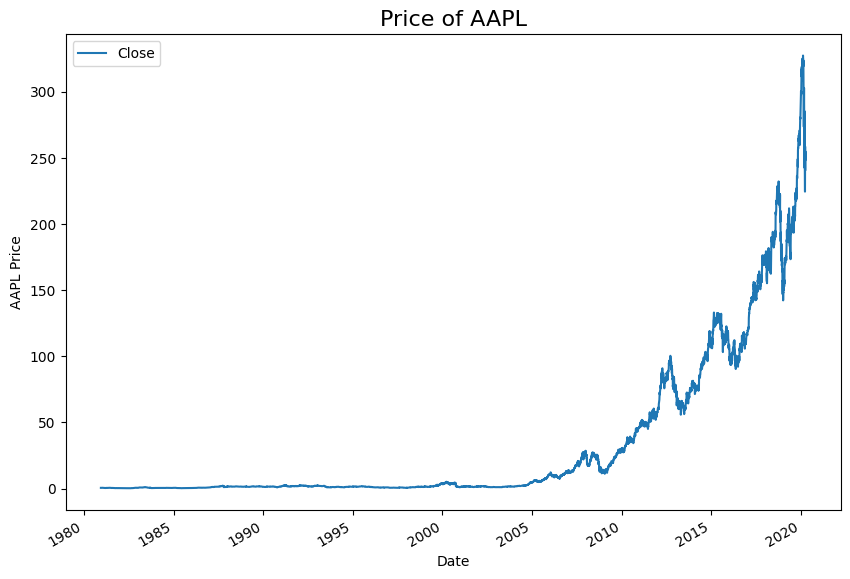

In [15]:
# Plotting the time series data from data_AAPL
data_AAPL.plot(figsize=(10,7))
plt.title('Price of AAPL',fontsize=16)
plt.xlabel('Date')
plt.ylabel('AAPL Price')

Text(0, 0.5, 'AMD Price')

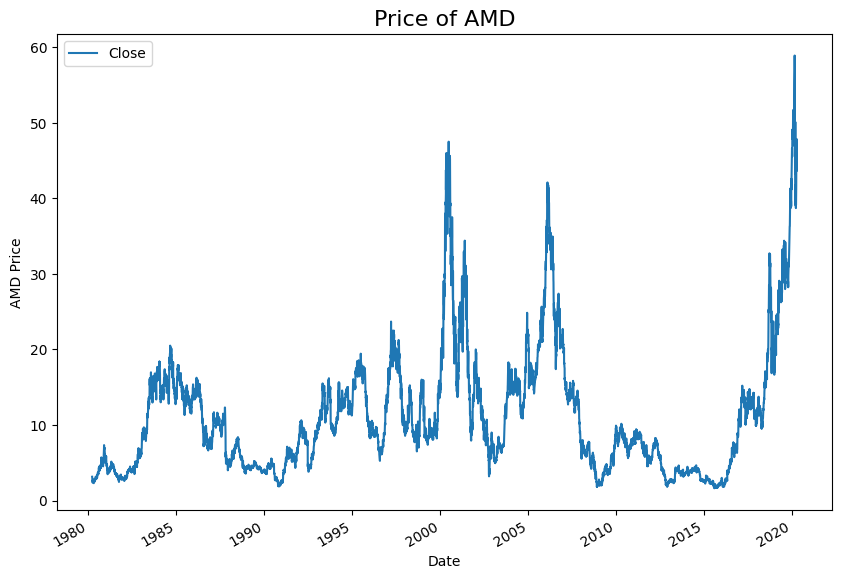

In [16]:
# Plotting the time series data from data_AMD
data_AMD.plot(figsize=(10,7))
plt.title('Price of AMD',fontsize=16)
plt.xlabel('Date')
plt.ylabel('AMD Price')

### Converting Data to Array

In [17]:
# Converting the index of the data_AAPL DataFrame (which contains dates) to a NumPy array
time_step_AAPL = data_AAPL.index.to_numpy()
# Extracting the 'Close' column values from the data_AAPL DataFrame and converting them to a NumPy array of type float32
close_AAPL = data_AAPL['Close'].values.astype('float32')

print(time_step_AAPL[:10], close_AAPL[:10])

['1980-12-12T00:00:00.000000000' '1980-12-15T00:00:00.000000000'
 '1980-12-16T00:00:00.000000000' '1980-12-17T00:00:00.000000000'
 '1980-12-18T00:00:00.000000000' '1980-12-19T00:00:00.000000000'
 '1980-12-22T00:00:00.000000000' '1980-12-23T00:00:00.000000000'
 '1980-12-24T00:00:00.000000000' '1980-12-26T00:00:00.000000000'] [0.51339287 0.48660713 0.45089287 0.46205357 0.47544643 0.50446427
 0.52901787 0.55133927 0.58035713 0.6339286 ]


In [18]:
# Converting the index of the data_AMD DataFrame (which contains dates) to a NumPy array
time_step_AMD = data_AMD.index.to_numpy()
# Extracting the 'Close' column values from the data_AMD DataFrame and converting them to a NumPy array of type float32
close_AMD = data_AMD['Close'].values.astype('float32')

print(time_step_AMD[:10], close_AMD[:10])

['1980-03-17T00:00:00.000000000' '1980-03-18T00:00:00.000000000'
 '1980-03-19T00:00:00.000000000' '1980-03-20T00:00:00.000000000'
 '1980-03-21T00:00:00.000000000' '1980-03-24T00:00:00.000000000'
 '1980-03-25T00:00:00.000000000' '1980-03-26T00:00:00.000000000'
 '1980-03-27T00:00:00.000000000' '1980-03-28T00:00:00.000000000'] [3.1458333 3.03125   3.0416667 3.0104167 2.9166667 2.6666667 2.6041667
 2.4479167 2.375     2.5416667]


### Creating two arrays: one for input (X) and one for target output (y). Each element in X is a time window from the original data, and the corresponding element in y is the value to be predicted based on that time window.

In [19]:
def create_windows(data, window_size, horizon):
    X = np.array([data[i:i + window_size] for i in range(len(data) - window_size - horizon + 1)])
    y = np.array([data[i + window_size + horizon - 1] for i in range(len(data) - window_size - horizon + 1)])
    return X, y

# Parameters
window_size = 5
horizon = 1


In [20]:
# Creating windows for the AAPL data  
# `window_size` determines how many data points are in one window.  
# `horizon` specifies how many future data points to predict.  
X_data_AAPL, y_data_AAPL = create_windows(data_AAPL['Close'], window_size, horizon)
X_data_AMD, y_data_AMD = create_windows(data_AMD['Close'], window_size, horizon)

In [21]:
# Splitting the dataset into train (80%), validation (10%), and test (10%) for the AAPL data
total_size_AAPL = len(X_data_AAPL)
train_size_AAPL = int(total_size_AAPL * 0.8)
val_size_AAPL = int(total_size_AAPL * 0.1)
test_size_AAPL = total_size_AAPL - train_size_AAPL - val_size_AAPL

# Splitting the dataset into train (80%), validation (10%), and test (10%) for the AMD data
total_size_AMD = len(X_data_AMD)
train_size_AMD = int(total_size_AMD * 0.8)
val_size_AMD = int(total_size_AMD * 0.1)
test_size_AMD = total_size_AMD - train_size_AMD - val_size_AMD

In [22]:
# Separating the AAPL data and AMD data into train set, validation set, and test set
X_train_AAPL, y_train_AAPL = X_data_AAPL[:train_size_AAPL], y_data_AAPL[:train_size_AAPL]
X_val_AAPL, y_val_AAPL = X_data_AAPL[train_size_AAPL:train_size_AAPL + val_size_AAPL], y_data_AAPL[train_size_AAPL:train_size_AAPL + val_size_AAPL]
X_test_AAPL, y_test_AAPL = X_data_AAPL[train_size_AAPL + val_size_AAPL:], y_data_AAPL[train_size_AAPL + val_size_AAPL:]

X_train_AMD, y_train_AMD = X_data_AMD[:train_size_AMD], y_data_AMD[:train_size_AMD]
X_val_AMD, y_val_AMD = X_data_AMD[train_size_AMD:train_size_AMD + val_size_AMD], y_data_AMD[train_size_AMD:train_size_AMD + val_size_AMD]
X_test_AMD, y_test_AMD = X_data_AMD[train_size_AMD + val_size_AMD:], y_data_AMD[train_size_AMD + val_size_AMD:]

In [23]:
print("Training AAPL set shape:", X_train_AAPL.shape, y_train_AAPL.shape)
print("Validation AAPL set shape:", X_val_AAPL.shape, y_val_AAPL.shape)
print("Test AAPL set shape:", X_test_AAPL.shape, y_test_AAPL.shape,"\n")

print("Training AMD set shape:", X_train_AMD.shape, y_train_AMD.shape)
print("Validation AMD set shape:", X_val_AMD.shape, y_val_AMD.shape)
print("Test AND set shape:", X_test_AMD.shape, y_test_AMD.shape)

Training AAPL set shape: (7923, 5) (7923,)
Validation AAPL set shape: (990, 5) (990,)
Test AAPL set shape: (991, 5) (991,) 

Training AMD set shape: (8074, 5) (8074,)
Validation AMD set shape: (1009, 5) (1009,)
Test AND set shape: (1010, 5) (1010,)


In [24]:
# Creating a DataFrame for AAPL verification
verification_df_AAPL = pd.DataFrame({
    'Window': [list(X_train_AAPL[i]) for i in range(5)],
    'Label': [y_train_AAPL[i] for i in range(5)]
})

print("Verification DataFrame for AAPL:")
print(verification_df_AAPL)

# Creating a DataFrame for AMD verification
verification_df_AMD = pd.DataFrame({
    'Window': [list(X_train_AMD[i]) for i in range(5)],
    'Label': [y_train_AMD[i] for i in range(5)]
})

print("\nVerification DataFrame for AMD:")
print(verification_df_AMD)


Verification DataFrame for AAPL:
                                              Window     Label
0  [0.5133928656578064, 0.4866071343421936, 0.450...  0.504464
1  [0.4866071343421936, 0.4508928656578064, 0.462...  0.529018
2  [0.4508928656578064, 0.4620535671710968, 0.475...  0.551339
3  [0.4620535671710968, 0.4754464328289032, 0.504...  0.580357
4  [0.4754464328289032, 0.5044642686843872, 0.529...  0.633929

Verification DataFrame for AMD:
                                              Window     Label
0  [3.1458332538604736, 3.03125, 3.04166674613952...  2.666667
1  [3.03125, 3.0416667461395264, 3.01041674613952...  2.604167
2  [3.0416667461395264, 3.0104167461395264, 2.916...  2.447917
3  [3.0104167461395264, 2.9166667461395264, 2.666...  2.375000
4  [2.9166667461395264, 2.6666667461395264, 2.604...  2.541667


### Create a baseline architecture with LSTM (units=50) and an output layer consisting of a Perceptron node with units=1. Use the ReLU activation function for the LSTM.

### **Baseline architecture of the LSTM model**

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model architecture
def baseline_lstm_model_arsitektur(input_shape):
    model1 = Sequential()
    model1.add(LSTM(50, activation='relu', input_shape=input_shape))
    model1.add(Dense(1))

    # Compile the model
    model1.compile(optimizer='adam', loss='mean_squared_error')
    model1.summary()
    return model1

### Baseline architecture of the AAPL model

In [26]:
input_shape_AAPL = (X_train_AAPL.shape[1], 1) # X_train_AAPL.shape[1] is the window size of 5
baseline_lstm_model_AAPL = baseline_lstm_model_arsitektur(input_shape_AAPL)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform the evaluation of the performance of the two architectures above on the test set by calculating the RMSE, MAE, and MAPE values. Provide a detailed explanation of the results.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_model(model1, X_train, y_train, X_val, y_val, epochs=200, batch_size=32):
    # Define callback for Early Stopping and Reduce Learning Rate on Plateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # Training the model with training and validation data
    train_result1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

    return train_result1

def mean_absolute_percentage_error(y_true, y_pred):
    # Calculating Mean Absolute Percentage Error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model1, X_test, y_test):
    # Evaluating the model using test data
    test_loss = model1.evaluate(X_test, y_test)
    y_pred = model1.predict(X_test)

    # Calculating Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return test_loss, rmse, mae, mape, y_pred

# Training and evaluating the LSTM model for the AAPL data
train_result1 = train_model(baseline_lstm_model_AAPL, X_train_AAPL, y_train_AAPL, X_val_AAPL, y_val_AAPL)
baseline_AAPL_test_loss, baseline_AAPL_rmse, baseline_AAPL_mae, baseline_AAPL_mape, y_pred = evaluate_model(baseline_lstm_model_AAPL, X_test_AAPL, y_test_AAPL)

# Evaluation metrics
print(f"Test Loss: {baseline_AAPL_test_loss}")
print(f"RMSE: {baseline_AAPL_rmse}")
print(f"MAE: {baseline_AAPL_mae}")
print(f"MAPE: {baseline_AAPL_mape}%")

Epoch 1/200
248/248 [==============================] - 9s 19ms/step - loss: 10.5899 - val_loss: 10.6433 - lr: 0.0010
Epoch 2/200
248/248 [==============================] - 4s 15ms/step - loss: 0.2247 - val_loss: 3.0018 - lr: 0.0010
Epoch 3/200
248/248 [==============================] - 3s 11ms/step - loss: 0.2364 - val_loss: 7.3289 - lr: 0.0010
Epoch 4/200
248/248 [==============================] - 3s 11ms/step - loss: 0.2283 - val_loss: 3.7376 - lr: 0.0010
Epoch 5/200
248/248 [==============================] - 3s 11ms/step - loss: 0.2153 - val_loss: 3.2128 - lr: 0.0010
Epoch 6/200
248/248 [==============================] - 4s 15ms/step - loss: 0.1939 - val_loss: 5.0529 - lr: 0.0010
Epoch 7/200
248/248 [==============================] - 2s 9ms/step - loss: 0.2263 - val_loss: 3.3986 - lr: 0.0010
Epoch 8/200
248/248 [==============================] - 2s 9ms/step - loss: 0.1418 - val_loss: 2.8347 - lr: 5.0000e-04
Epoch 9/200
248/248 [==============================] - 2s 8ms/step - loss: 0

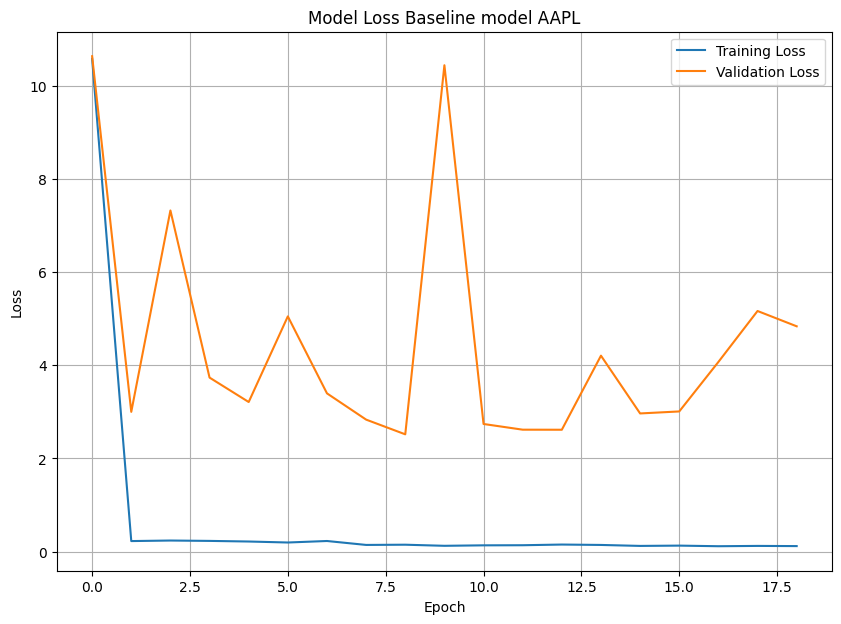

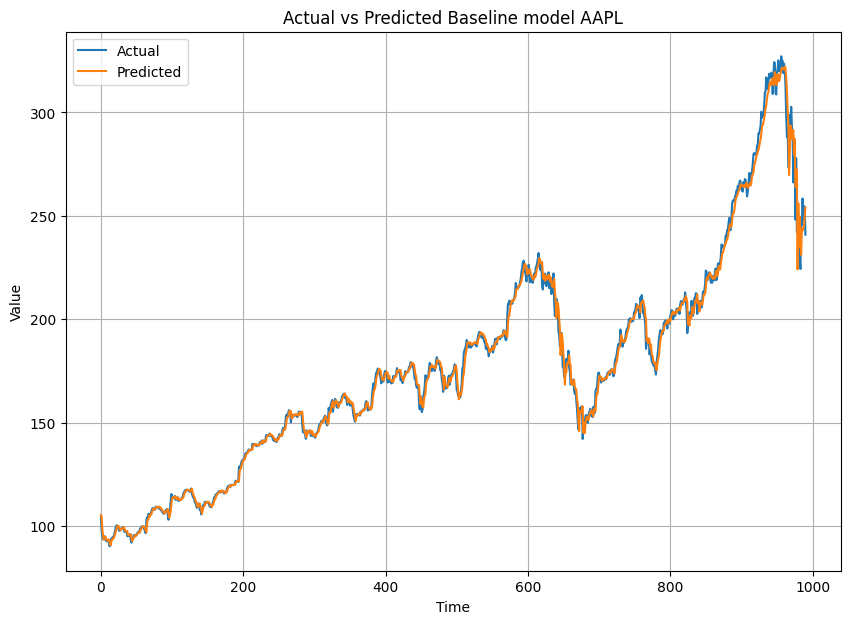

In [28]:
# Plotting metrics
def plot_metrics(train_result1, y_test, y_pred):
    # Plotting Loss
    plt.figure(figsize=(10, 7))
    plt.plot(train_result1.history['loss'], label='Training Loss')
    plt.plot(train_result1.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Baseline model AAPL')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 7))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs Predicted Baseline model AAPL')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# plot_metrics with train_result, y_test, and the obtained y_pred
plot_metrics(train_result1, y_test_AAPL, y_pred)

### Baseline architecture of the AMD model

In [29]:
input_shape_AMD = (X_train_AMD.shape[1], 1) # X_train_AMD.shape[1] is the window size of 5
baseline_lstm_model_AMD = baseline_lstm_model_arsitektur(input_shape_AMD)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform the evaluation of the performance of the two architectures above on the test set by calculating the RMSE, MAE, and MAPE values. Provide a detailed explanation of the results.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_model(model1, X_train, y_train, X_val, y_val, epochs=200, batch_size=32):
    # Definition of callback for Early Stopping and Reduce Learning Rate on Plateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # Training the model with training and validation data
    train_result1 = model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

    return train_result1

def mean_absolute_percentage_error(y_true, y_pred):
    # Calculating Mean Absolute Percentage Error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model1, X_test, y_test):
    # Evaluating the model using test data
    test_loss = model1.evaluate(X_test, y_test)
    y_pred = model1.predict(X_test)

    # Calculating Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return test_loss, rmse, mae, mape, y_pred

# Training and evaluating the LSTM model for the AAPL data
train_result1 = train_model(baseline_lstm_model_AMD, X_train_AMD, y_train_AMD, X_val_AMD, y_val_AMD)
baseline_AMD_test_loss, baseline_AMD_rmse, baseline_AMD_mae, baseline_AMD_mape, y_pred = evaluate_model(baseline_lstm_model_AMD, X_test_AMD, y_test_AMD)

# Evaluation metrics
print(f"Test Loss: {baseline_AMD_test_loss}")
print(f"RMSE: {baseline_AMD_rmse}")
print(f"MAE: {baseline_AMD_mae}")
print(f"MAPE: {baseline_AMD_mape}%")

Epoch 1/200
253/253 [==============================] - 5s 10ms/step - loss: 11.3000 - val_loss: 0.1155 - lr: 0.0010
Epoch 2/200
253/253 [==============================] - 2s 9ms/step - loss: 0.5447 - val_loss: 0.0483 - lr: 0.0010
Epoch 3/200
253/253 [==============================] - 2s 8ms/step - loss: 0.4732 - val_loss: 0.0588 - lr: 0.0010
Epoch 4/200
253/253 [==============================] - 2s 8ms/step - loss: 0.3875 - val_loss: 0.0324 - lr: 0.0010
Epoch 5/200
253/253 [==============================] - 3s 12ms/step - loss: 0.3907 - val_loss: 0.0346 - lr: 0.0010
Epoch 6/200
253/253 [==============================] - 3s 11ms/step - loss: 0.3705 - val_loss: 0.0302 - lr: 0.0010
Epoch 7/200
253/253 [==============================] - 2s 8ms/step - loss: 0.3575 - val_loss: 0.0438 - lr: 0.0010
Epoch 8/200
253/253 [==============================] - 2s 9ms/step - loss: 0.3302 - val_loss: 0.0250 - lr: 0.0010
Epoch 9/200
253/253 [==============================] - 2s 8ms/step - loss: 0.3288 - 

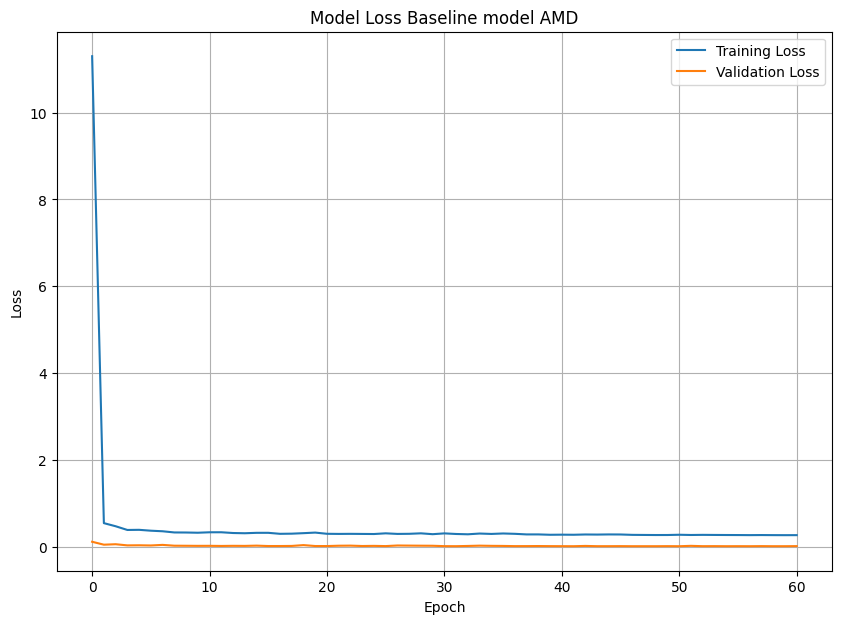

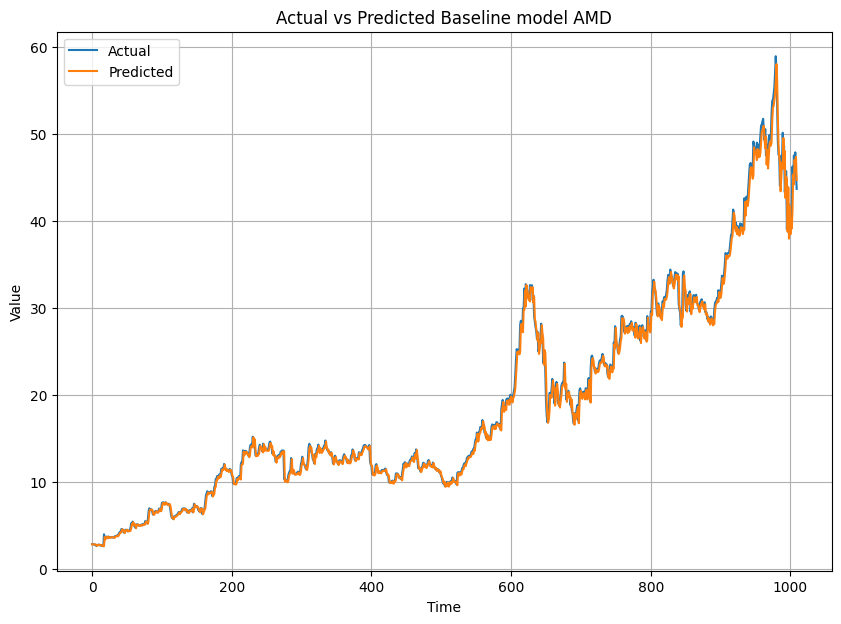

In [31]:
# Plotting metrics
def plot_metrics(train_result1, y_test, y_pred):
    # Plotting Loss
    plt.figure(figsize=(10, 7))
    plt.plot(train_result1.history['loss'], label='Training Loss')
    plt.plot(train_result1.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Baseline model AMD')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 7))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs Predicted Baseline model AMD')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# plot_metrics with train_result, y_test, and the obtained y_pred
plot_metrics(train_result1, y_test_AMD, y_pred)

### Modify the architecture on the baseline after knowing the results from the baseline to achieve optimal performance through hyperparameter tuning

### **Modify the LSTM model architecture**

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def optimized_lstm_model(input_shape):
    model2 = Sequential()

    # Adding a first Bidirectional LSTM layer
    model2.add(LSTM(512, activation='relu', return_sequences=True, input_shape=input_shape))
    model2.add(Dropout(0.5))  # Adding dropout to prevent overfitting

    # Adding a second LSTM layer
    model2.add(LSTM(512, activation='relu'))
    model2.add(Dropout(0.5))  # Adding dropout to prevent overfitting

    # Output layer
    model2.add(Dense(1))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model2.compile(optimizer, loss='mean_squared_error')
    model2.summary()

    return model2


### Modify the AAPL model architecture

In [33]:
input_shape_AAPL = (X_train_AAPL.shape[1], 1) # X_train_AAPL.shape[1] is the window size of 5
optimized_model_AAPL = optimized_lstm_model(input_shape_AAPL)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 512)            1052672   
                                                                 
 dropout (Dropout)           (None, 5, 512)            0         
                                                                 
 lstm_3 (LSTM)               (None, 512)               2099200   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 3152385 (12.03 MB)
Trainable params: 3152385 (12.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform the evaluation of the performance of the two architectures above on the test set by calculating the RMSE, MAE, and MAPE values. Provide a detailed explanation of the results.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_model(model2, X_train, y_train, X_val, y_val, epochs=200, batch_size=32):
    # Define callback for Early Stopping and Reduce Learning Rate on Plateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # Training the model with training and validation data
    train_result2 = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

    return train_result2

def mean_absolute_percentage_error(y_true, y_pred):
    # Calculating Mean Absolute Percentage Error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model2, X_test, y_test):
    # Evaluating the model using test data
    test_loss = model2.evaluate(X_test, y_test)
    y_pred = model2.predict(X_test)

    # Calculating Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return test_loss, rmse, mae, mape, y_pred

# Training and evaluating the LSTM model for the AAPL data
train_result2 = train_model(optimized_model_AAPL, X_train_AAPL, y_train_AAPL, X_val_AAPL, y_val_AAPL)
optimized_AAPL_test_loss, optimized_AAPL_rmse, optimized_AAPL_mae, optimized_AAPL_mape, y_pred_optimized = evaluate_model(optimized_model_AAPL, X_test_AAPL, y_test_AAPL)

# Evaluation metrics
print(f"Test Loss: {optimized_AAPL_test_loss}")
print(f"RMSE: {optimized_AAPL_rmse}")
print(f"MAE: {optimized_AAPL_mae}")
print(f"MAPE: {optimized_AAPL_mape}%")


Epoch 1/200
248/248 [==============================] - 9s 20ms/step - loss: 18.6793 - val_loss: 91.3379 - lr: 0.0010
Epoch 2/200
248/248 [==============================] - 6s 24ms/step - loss: 6.8472 - val_loss: 133.7892 - lr: 0.0010
Epoch 3/200
248/248 [==============================] - 5s 18ms/step - loss: 6.8182 - val_loss: 29.9764 - lr: 0.0010
Epoch 4/200
248/248 [==============================] - 5s 18ms/step - loss: 8.0516 - val_loss: 14.4551 - lr: 0.0010
Epoch 5/200
248/248 [==============================] - 6s 23ms/step - loss: 6.0980 - val_loss: 43.0047 - lr: 0.0010
Epoch 6/200
248/248 [==============================] - 4s 18ms/step - loss: 7.0688 - val_loss: 25.9549 - lr: 0.0010
Epoch 7/200
248/248 [==============================] - 5s 21ms/step - loss: 5.3470 - val_loss: 45.6449 - lr: 0.0010
Epoch 8/200
248/248 [==============================] - 5s 20ms/step - loss: 5.1051 - val_loss: 10.8519 - lr: 0.0010
Epoch 9/200
248/248 [==============================] - 4s 18ms/step - 

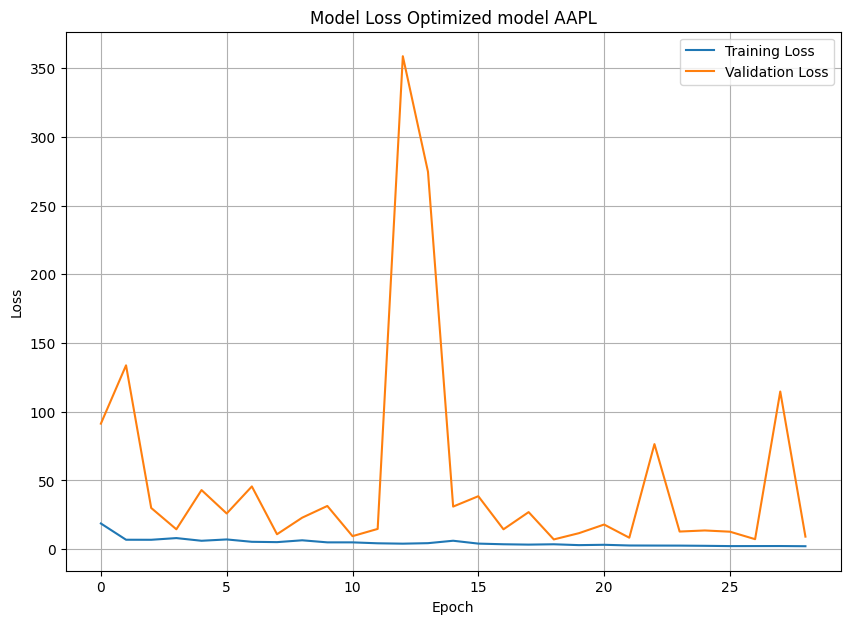

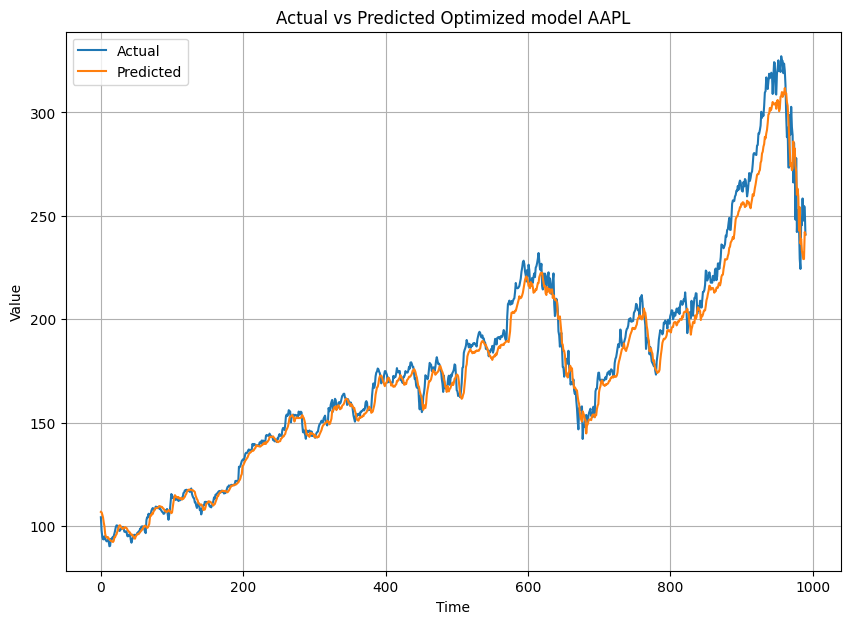

In [35]:
# Plotting metrics
def plot_metrics(train_result2, y_test, y_pred):
    # Plotting Loss
    plt.figure(figsize=(10, 7))
    plt.plot(train_result2.history['loss'], label='Training Loss')
    plt.plot(train_result2.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Optimized model AAPL')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 7))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs Predicted Optimized model AAPL')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# plot_metrics with train_result, y_test, and the obtained y_pred
plot_metrics(train_result2, y_test_AAPL, y_pred_optimized)


### Modify the AMD model architecture

In [36]:
input_shape_AMD = (X_train_AMD.shape[1], 1) # X_train_AMD.shape[1] is the window size of 5
optimized_model_AMD = optimized_lstm_model(input_shape_AMD)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 512)            1052672   
                                                                 
 dropout_2 (Dropout)         (None, 5, 512)            0         
                                                                 
 lstm_5 (LSTM)               (None, 512)               2099200   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 3152385 (12.03 MB)
Trainable params: 3152385 (12.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform the evaluation of the performance of the two architectures above on the test set by calculating the RMSE, MAE, and MAPE values. Provide a detailed explanation of the results.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_model(model2, X_train, y_train, X_val, y_val, epochs=200, batch_size=32):
  # Define callback for Early Stopping and Reduce Learning Rate on Plateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    # Training the model with training and validation data
    train_result2 = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr])

    return train_result2

def mean_absolute_percentage_error(y_true, y_pred):
    # Calculating Mean Absolute Percentage Error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model2, X_test, y_test):
    # Evaluating the model using test data
    test_loss = model2.evaluate(X_test, y_test)
    y_pred = model2.predict(X_test)

    # Calculating Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    return test_loss, rmse, mae, mape, y_pred

# Training and evaluating the model for the AMD data
train_result2 = train_model(optimized_model_AMD, X_train_AMD, y_train_AMD, X_val_AMD, y_val_AMD)
optimized_AMD_test_loss, optimized_AMD_rmse, optimized_AMD_mae, optimized_AMD_mape, y_pred_optimized = evaluate_model(optimized_model_AMD, X_test_AMD, y_test_AMD)

# Evaluation metrics
print(f"Test Loss: {optimized_AMD_test_loss}")
print(f"RMSE: {optimized_AMD_rmse}")
print(f"MAE: {optimized_AMD_mae}")
print(f"MAPE: {optimized_AMD_mape}%")


Epoch 1/200
253/253 [==============================] - 9s 24ms/step - loss: 12.0017 - val_loss: 0.0647 - lr: 0.0010
Epoch 2/200
253/253 [==============================] - 4s 17ms/step - loss: 3.1705 - val_loss: 0.0613 - lr: 0.0010
Epoch 3/200
253/253 [==============================] - 6s 23ms/step - loss: 3.1674 - val_loss: 0.3864 - lr: 0.0010
Epoch 4/200
253/253 [==============================] - 5s 18ms/step - loss: 2.9609 - val_loss: 0.2030 - lr: 0.0010
Epoch 5/200
253/253 [==============================] - 4s 17ms/step - loss: 3.0059 - val_loss: 0.3254 - lr: 0.0010
Epoch 6/200
253/253 [==============================] - 6s 23ms/step - loss: 3.0538 - val_loss: 0.1508 - lr: 0.0010
Epoch 7/200
253/253 [==============================] - 5s 18ms/step - loss: 2.6787 - val_loss: 0.0770 - lr: 0.0010
Epoch 8/200
253/253 [==============================] - 5s 20ms/step - loss: 2.4587 - val_loss: 0.0472 - lr: 5.0000e-04
Epoch 9/200
253/253 [==============================] - 6s 22ms/step - loss:

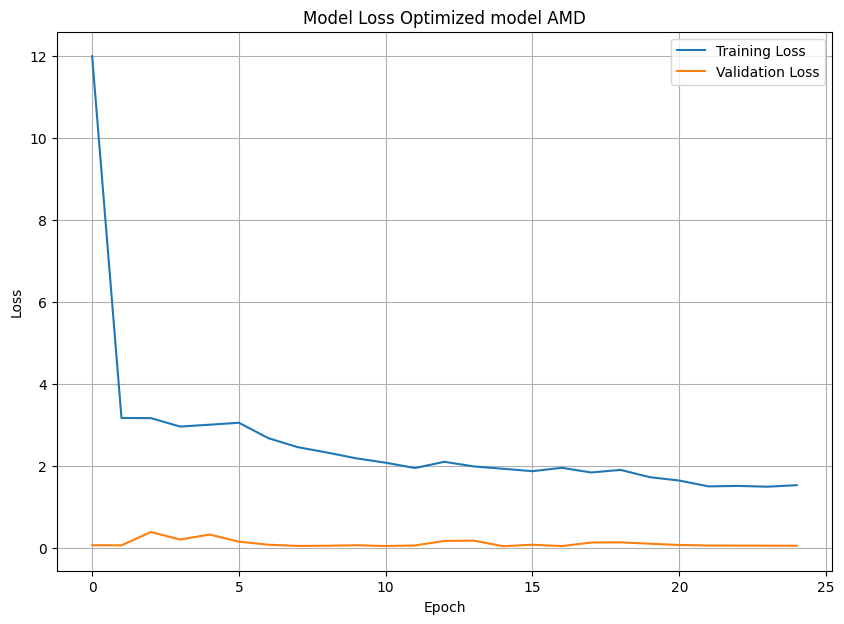

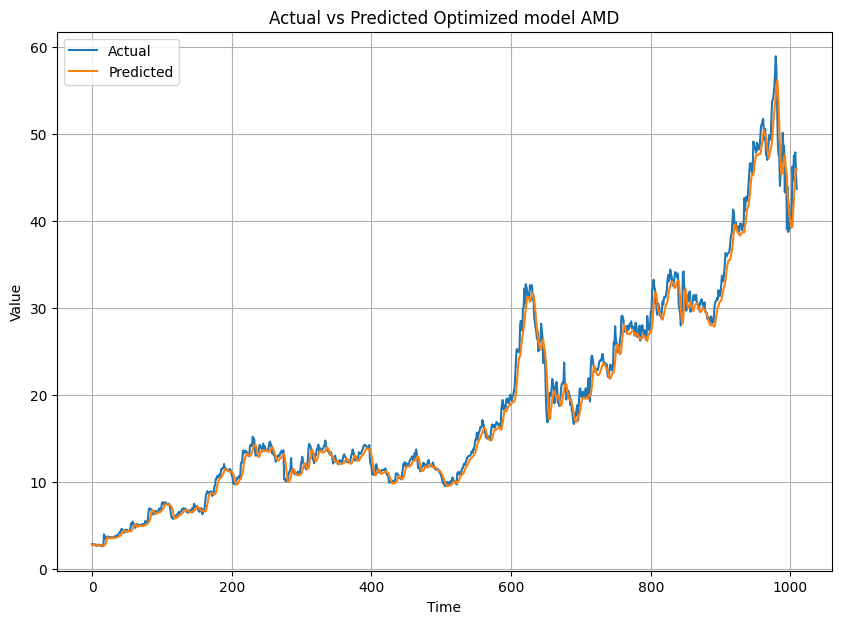

In [38]:
# Plotting metrics
def plot_metrics(train_result2, y_test, y_pred):
    # Plotting Loss
    plt.figure(figsize=(10, 7))
    plt.plot(train_result2.history['loss'], label='Training Loss')
    plt.plot(train_result2.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Optimized model AMD')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 7))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title('Actual vs Predicted Optimized model AMD')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

# plot_metrics with train_result, y_test, and the obtained y_pred
plot_metrics(train_result2, y_test_AMD, y_pred_optimized)


From both LSTM model architectures, namely the baseline LSTM architecture and the modified LSTM architecture, it is evident that the baseline LSTM architecture outperforms in terms of overall evaluation results, including RMSE, MAE, and MAPE, when comparing the AAPL data between the baseline and modified architectures, as well as in the evaluation results of the AMD data between the baseline and modified architectures. Thus, the baseline architecture, which does not utilize hyperparameters, can yield better evaluation results than the modified LSTM architecture.